In [7]:
import networkx as nx
import numpy as np
import torch
from datetime import datetime
import os
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch_geometric.nn as geom_nn

from geneticalgorithm import geneticalgorithm as ga
import sys


import pandas as pd
import torch_geometric.transforms as T

sys.path.append("Models/")
from models import GNN

sys.path.append("FastCover/")

from utils import *


In [43]:
print(f"\nMDH value: {Func(_, MDH = True)}\n")

for i in range(1):
    
    print(f"\n -- Next layer {layers[i]} -- \n")

    varbound = np.array([[-10,10]] * getDimParams(Models[i]) )

    algorithm_param = {'max_num_iteration' : max_iterations,\
                       'population_size' : pop_size,\
                       'mutation_probability' : 0.4,\
                       'elit_ratio': elitratio,\
                       'crossover_probability': 0.5,\
                       'parents_portion': 0.3,\
                       'crossover_type' : 'uniform',\
                       'max_iteration_without_improv' : max_iterations//2}

    GA_model = ga(function = Func,\
                dimension = getDimParams(Models[i]),\
                variable_type = 'real',\
                variable_boundaries = varbound,\
                algorithm_parameters = algorithm_param,
                function_timeout = 1_000_000,
                convergence_curve = False)

    GA_model.run()
    
    sd = getStateDict(Models[i], GA_model.best_variable)
    Models[i].load_state_dict(sd)
    
    
    torch.save(Models[i].state_dict(), 
                       f=f"{PATH_SAVE_TRAINS}{layers[i]}_seed_{SEED}_thr_{int(threshold*10)}_date_{dt_string}.pt")


MDH value: 0.10980000000000001


 -- Next layer GCN -- 

 The best solution found:                                                                           
 [ 6.8700422  -9.985355    7.05937959 -8.15461599  5.10598043 -5.70885444
  6.3957135  -5.6072306   3.24511135  0.87082769  0.66981579 -9.66719836]

 Objective function:
 0.1448

 -- Next layer GAT -- 

 The best solution found:                                                                           
 [ 8.3139919  -3.75410222 -4.06345056 -7.89338595 -4.67451582 -9.66935643
 -4.53386547  5.61591643  4.05084383 -6.74853872 -7.15781156  7.00374903
 -6.3260968  -6.4833673   6.57493511 -9.7774226   7.12981889 -5.39548039
 -8.92924538 -7.83215412  6.71131878  8.3187963   1.89962889 -5.52080425
  1.30966107 -9.26320274  0.90513122  2.19709128  8.17347306  1.50900392
 -6.63167342 -0.61815319  0.99262082  9.52104568  0.02769271  1.83246848
  7.59793191  3.41168482  3.14364795  8.06065282  6.00915683  7.59111487
 -1.45708027  8.77571429 


 -- Next layer GraphConv -- 

 The best solution found:                                                                           
 [-2.20167672 -0.50893084  6.95198853  9.66359482 -4.50386573  1.08336204
 -6.08163044  3.3439421   8.00092741  9.51524301 -0.90926438  4.20684493
 -4.51625733  2.88526166 -5.02851575  1.23462924 -5.45221991 -4.86354431
 -2.49282915  1.80760407  6.42515617  5.23196087]

 Objective function:
 0.2871

 -- Next layer SAGE -- 

 The best solution found:                                                                           
 [-1.14135628e+00  9.61609279e+00 -9.03242467e+00 -1.79895085e+00
 -1.15068411e-01 -9.56170766e+00  7.55095326e-01 -9.48555129e+00
  6.65183702e+00 -3.11948256e+00  3.12402680e+00  7.33468665e+00
  2.97387212e+00  4.56095179e+00  3.28418884e+00  8.41256546e+00
 -6.30663091e+00 -2.14795638e+00  9.33244675e-01 -5.03849979e+00
  1.95955138e+00  5.35843274e+00  3.79429414e+00 -7.70902005e+00
 -3.75963811e+00  8.41499682e+00 -1.88798781e+00 -


 -- Next layer SGConv -- 

 The best solution found:                                                                           
 [ 2.59904476 -1.16823823  6.4536819  -6.17387285 -2.21246408  5.83867318
  6.22916647 -3.91700044  6.22256437  6.23754996  9.20813706 -4.96065287
  2.94160007 -8.51686465  4.63353701 -8.66905488  8.38562899 -0.22166212
 -2.42688662 -7.73496179  4.20894157 -9.16459322 -9.17558989 -6.7005429
 -9.71135199  8.55269576 -7.57072274 -0.2218331   4.53807554 -7.35875079
  1.17503602 -9.28534906 -9.00701668  9.05557376  3.70553566  6.2508097
 -4.83110197  3.45792479 -8.59876322 -2.63140296  0.70879556  0.03382566
 -4.22292242 -8.51042793 -3.3863301   5.5392158  -6.70505128 -4.5185445
  1.6043118  -2.37496753 -5.20981611 -6.81340889  7.5163493   0.34039043
 -4.11875069  7.86310434  5.68204852  7.0589541   0.61783558  5.39608429
 -8.8074279   6.36029375 -2.96945776  3.74394073  9.59467629  7.25543323
  9.42813975 -4.24393309  1.19209978  0.27155706 -7.31128801 -0.198129

## Revisando las features

In [2]:
PATH_TO_TRAIN = "./BRKGA/instances/scalefree/train/"

PATH_SAVE_TRAINS = "Models/runs/scalefree/GA/"
SEED = 13

max_iterations = 1
pop_size = 2
elitratio = 0.1
threshold = 0.5

dt_string = datetime.now().strftime("%m-%d_%H-%M")

In [190]:
def loadFeatures(file, remove_degree = True, remove_BC = False):
#file = "./BRKGA/instances/socialnetworks/feats/graph_karate_feat.txt"
    temp = []
    with open(file) as f:
        c = 0
        for line in f.readlines()[1:]:
            c+=1
            feats = np.array(line.split(","), dtype = float)
            temp.append(feats)
        temp = np.array(temp)
    FeaturesDF = pd.DataFrame(temp)
    FeaturesDF.columns = ["BC", "PageRank", "degree", "closeness_centrality", "EigenDegree"]
    if remove_degree:
        FeaturesDF = FeaturesDF.drop(["degree"], axis = 1)
    if remove_BC:
        FeaturesDF = FeaturesDF.drop(["BC"], axis = 1)
    return FeaturesDF

def loadGraph(file):
    return igraph.Graph.Read_Edgelist(file, directed = False).to_networkx()
    

def plotFeatures(file, plot_ = True):
    #file = "./BRKGA/instances/socialnetworks/feats/deezer_HR_feat.txt"
    DataFeats = loadFeatures(file, remove_degree = True)
    print(DataFeats.shape)
    print(DataFeats.describe())
    
    if plot_:
        DataFeats.boxplot();
        name = file.split("/")[-1]
        plt.title(f"Feature boxplot for {name} size: {DataFeats.shape[0]}")
        plt.show()
    

In [67]:
def checkFeaturesTargetSet(G, DataFeats):
    Targets = []
    for col in DataFeats.columns:
        _, ts = FindMinimumTarget(G, out = torch.tensor(DataFeats[col]), threshold = 0.5)
        Targets.append(ts)
        print(f"for {col} TargetSet: {ts}")
    _, ts = FindMinimumTarget(G, out = None, threshold = 0.5)
    print(f"for MDH TargetSet: {ts}")
    Targets.append(ts)
    return Targets

In [68]:
def CheckAll(file, file_graph):
    #file = "./BRKGA/instances/socialnetworks/feats/graph_karate_feat.txt"
    #file_graph = "./BRKGA/instances/socialnetworks/txt/graph_karate.txt"
    DataFeats = loadFeatures(file)
    plotFeatures(file, plot_ = False)

    G = loadGraph(file_graph)
    print()
    vals = checkFeaturesTargetSet(G, DataFeats)
    vals.append(DataFeats.shape[0])
    return vals

In [69]:
def Scale(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))

def Standar(X):
    return (X - np.mean(X)) / np.std(X)

In [7]:
graphFeatures = [PATH_TO_TRAIN+"feats/"+feat for feat in os.listdir(PATH_TO_TRAIN+'feats')]
graphs = [PATH_TO_TRAIN+"txt/"+feat for feat in os.listdir(PATH_TO_TRAIN+'txt')]

In [8]:
file = "./BRKGA/instances/socialnetworks/feats/graph_karate_feat.txt"
file_graph = "./BRKGA/instances/socialnetworks/txt/graph_karate.txt"
CheckAll(file, file_graph)

(62, 4)
              BC   PageRank  closeness_centrality  EigenDegree
count  62.000000  62.000000             62.000000    62.000000
mean    0.039283   0.016129              0.307240     0.090777
std     0.050965   0.007833              0.052027     0.089542
min     0.000000   0.004835              0.178363     0.000537
25%     0.003083   0.009686              0.261567     0.018322
50%     0.021630   0.015781              0.316062     0.047450
75%     0.056086   0.021398              0.338889     0.158907
max     0.248237   0.032137              0.417808     0.315781

for BC TargetSet: 12
for PageRank TargetSet: 8
for closeness_centrality TargetSet: 13
for EigenDegree TargetSet: 10
for MDH TargetSet: 8


[12, 8, 13, 10, 8, 62]

In [9]:
i = 10
CheckAll(graphFeatures[i], graphs[i])

(1000, 4)
                BC     PageRank  closeness_centrality  EigenDegree
count  1000.000000  1000.000000           1000.000000  1000.000000
mean      0.000992     0.001000              0.503241     0.028524
std       0.001138     0.000407              0.016642     0.013658
min       0.000057     0.000436              0.444989     0.009142
25%       0.000340     0.000721              0.491392     0.019177
50%       0.000567     0.000868              0.502262     0.024140
75%       0.001125     0.001151              0.514418     0.033415
max       0.008403     0.002815              0.551934     0.090605

for BC TargetSet: 197
for PageRank TargetSet: 200
for closeness_centrality TargetSet: 198
for EigenDegree TargetSet: 201
for MDH TargetSet: 198


[197, 200, 198, 201, 198, 1000]

## Para socialnetworks

In [120]:
Trials = ["graph_karate", "socfb-Mich67", "graph_ncstrlwg2", "graph_CA-HepPh", "graph_CA-AstroPh", 
          "musae_git", "graph_CA-CondMat", "graph_Email-Enron", "gemsec_facebook_artist", "deezer_HR"]
Res = {t:[] for t in Trials}
for trial in Trials:
    print(f"\n------ {trial} ------\n")
    file = "./BRKGA/instances/socialnetworks/feats/"+trial+"_feat.txt"
    file_graph = "./BRKGA/instances/socialnetworks/txt/"+trial+".txt"
    Res[trial] = CheckAll(file, file_graph)


------ graph_karate ------

(62, 4)
              BC   PageRank  closeness_centrality  EigenDegree
count  62.000000  62.000000             62.000000    62.000000
mean    0.039283   0.016129              0.307240     0.090777
std     0.050965   0.007833              0.052027     0.089542
min     0.000000   0.004835              0.178363     0.000537
25%     0.003083   0.009686              0.261567     0.018322
50%     0.021630   0.015781              0.316062     0.047450
75%     0.056086   0.021398              0.338889     0.158907
max     0.248237   0.032137              0.417808     0.315781

for BC TargetSet: 12
for PageRank TargetSet: 8
for closeness_centrality TargetSet: 13
for EigenDegree TargetSet: 10
for MDH TargetSet: 8

------ socfb-Mich67 ------

(3748, 4)
                BC     PageRank  closeness_centrality   EigenDegree
count  3748.000000  3748.000000           3748.000000  3.748000e+03
mean      0.000493     0.000267              0.356777  9.193655e-03
std       0.001

FastCover\utils.py:111: RuntimeWarning: invalid value encountered in true_divide
  Infected += (Num_Neighs_Infected/Num_Neighs >= threshold)


for BC TargetSet: 1749
for PageRank TargetSet: 1519
for closeness_centrality TargetSet: 1696
for EigenDegree TargetSet: 1821
for MDH TargetSet: 1525

------ graph_CA-AstroPh ------

(18772, 4)
                 BC      PageRank  closeness_centrality   EigenDegree
count  1.877200e+04  18772.000000          18772.000000  18772.000000
mean   1.551386e-04      0.000053              0.221691      0.002289
std    5.645236e-04      0.000048              0.058353      0.006931
min    0.000000e+00      0.000000              0.000000      0.000000
25%    0.000000e+00      0.000023              0.206888      0.000019
50%    8.599218e-07      0.000040              0.231757      0.000217
75%    7.232553e-05      0.000063              0.253385      0.001388
max    2.847202e-02      0.000715              0.333642      0.145652



FastCover\utils.py:111: RuntimeWarning: invalid value encountered in true_divide
  Infected += (Num_Neighs_Infected/Num_Neighs >= threshold)


for BC TargetSet: 1963
for PageRank TargetSet: 1722
for closeness_centrality TargetSet: 1763
for EigenDegree TargetSet: 1895
for MDH TargetSet: 1637

------ musae_git ------

(37700, 4)
                 BC      PageRank  closeness_centrality   EigenDegree
count  3.770000e+04  37700.000000          37700.000000  3.770000e+04
mean   6.021929e-05      0.000027              0.313667  2.372857e-03
std    1.939652e-03      0.000130              0.040806  4.571138e-03
min    0.000000e+00      0.000005              0.141389  3.543992e-12
25%    1.707436e-08      0.000008              0.284141  1.671725e-04
50%    9.572588e-07      0.000013              0.311260  1.083886e-03
75%    1.173095e-05      0.000024              0.346949  3.186910e-03
max    2.698645e-01      0.016514              0.523081  3.559490e-01

for BC TargetSet: 453
for PageRank TargetSet: 225
for closeness_centrality TargetSet: 513
for EigenDegree TargetSet: 211
for MDH TargetSet: 196

------ graph_CA-CondMat ------

(23133

In [126]:
ResSN = pd.DataFrame(Res).T
ResSN.columns = ["BC", "PageRank","closeness_centrality","EigenDegree","MDH" ,"size"]
ResSN

,BC,PageRank,closeness_centrality,EigenDegree,MDH,size
graph_karate,12,8,13,10,8,62
socfb-Mich67,418,250,246,204,206,3748
graph_ncstrlwg2,1266,1103,1308,1314,1108,6396
graph_CA-HepPh,1749,1519,1696,1821,1525,12008
graph_CA-AstroPh,1963,1722,1763,1895,1637,18772
musae_git,453,225,513,211,196,37700
graph_CA-CondMat,3189,2884,3460,3610,2936,23133
graph_Email-Enron,3107,2901,3034,3033,2880,36692
gemsec_facebook_artist,1134,869,1127,834,789,50515
deezer_HR,4814,3271,3763,2883,2377,54573


In [128]:
ResSN.to_csv("SN_Diffusion_results_for_features.csv")

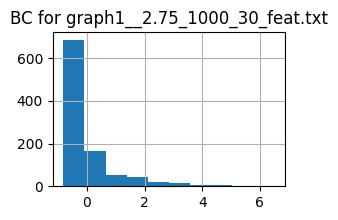

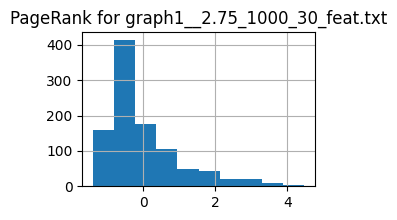

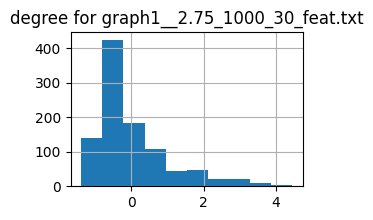

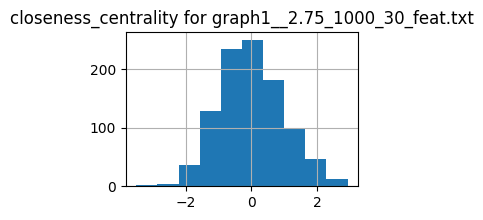

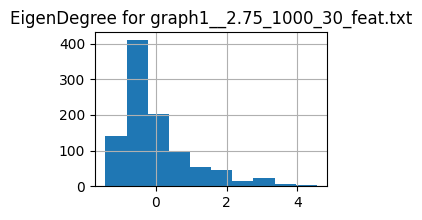

In [187]:
i = 10
DataFeats = loadFeatures(graphFeatures[i], remove_degree = False)
for feat in DataFeats.columns:
    fig, ax = plt.subplots(figsize=(3,2)) 
    Standar(DataFeats[feat]).hist()
    name = graphFeatures[i].split("/")[-1]
    plt.title(f"{feat} for {name}")
    plt.show()

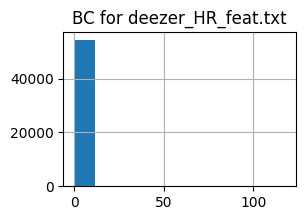

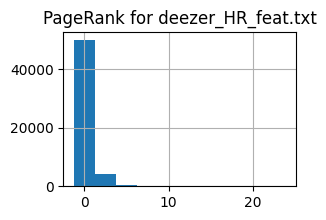

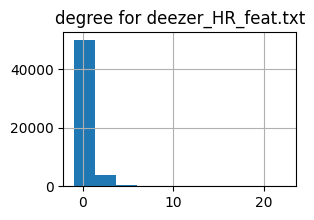

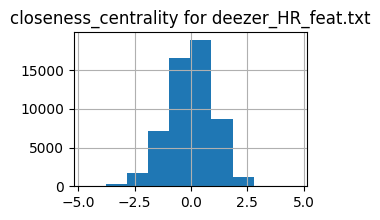

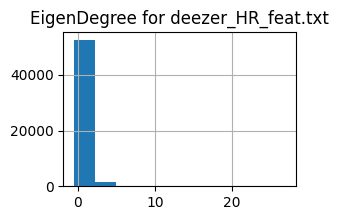

In [186]:
file = "./BRKGA/instances/socialnetworks/feats/deezer_HR_feat.txt"
DataFeats = loadFeatures(file, remove_degree = False)

for feat in DataFeats.columns:
    fig, ax = plt.subplots(figsize=(3,2)) 
    Standar(DataFeats[feat]).hist()
    name = file.split("/")[-1]
    plt.title(f"{feat} for {name}")
    plt.show()

In [184]:
np.sum(Standar(DataFeats.BC)>0.1)

14525

In [64]:
file = "./BRKGA/instances/socialnetworks/feats/com-dblp.ungraph_feat.txt"
DataFeats = loadFeatures(file, remove_degree = True)

plotFeatures(file, plot_ = False)

(317080, 4)
                  BC      PageRank  closeness_centrality   EigenDegree
count  317080.000000  3.170800e+05         317080.000000  3.170800e+05
mean        0.000018  3.153778e-06              0.149551  4.575209e-05
std         0.000137  2.952273e-06              0.018079  1.775301e-03
min         0.000000  5.142417e-07              0.065838  1.799850e-22
25%         0.000000  1.780517e-06              0.137910  1.717584e-10
50%         0.000000  2.420416e-06              0.150167  3.106903e-09
75%         0.000003  3.308642e-06              0.161779  6.305821e-08
max         0.012514  9.764623e-05              0.222223  9.961821e-02


## Ahora con Erdos

In [208]:
PATH_TO_TRAIN = "./BRKGA/instances/Erdos/test/"
graphs = [(feat).replace(".txt", "") for feat in os.listdir(PATH_TO_TRAIN+'txt')]
PATH_TO_TRAIN = "./BRKGA/instances/Erdos/train/"
graphs += [(feat).replace(".txt", "") for feat in os.listdir(PATH_TO_TRAIN+'txt')]
print(len(graphs))
#graphs = np.random.choice(graphs, 10)
graphs

54


['ER_10000_10_0',
 'ER_10000_10_1',
 'ER_10000_15_0',
 'ER_10000_15_1',
 'ER_10000_20_0',
 'ER_10000_20_1',
 'ER_20000_10_0',
 'ER_20000_10_1',
 'ER_20000_15_0',
 'ER_20000_15_1',
 'ER_20000_20_0',
 'ER_20000_20_1',
 'ER_30000_10_0',
 'ER_30000_15_0',
 'ER_30000_20_0',
 'ER_50000_10_0',
 'ER_50000_15_0',
 'ER_50000_20_0',
 'ER_1000_10_0',
 'ER_1000_10_1',
 'ER_1000_10_2',
 'ER_1000_10_3',
 'ER_1000_15_0',
 'ER_1000_15_1',
 'ER_1000_15_2',
 'ER_1000_15_3',
 'ER_1000_20_0',
 'ER_1000_20_1',
 'ER_1000_20_2',
 'ER_1000_20_3',
 'ER_2000_10_0',
 'ER_2000_10_1',
 'ER_2000_10_2',
 'ER_2000_10_3',
 'ER_2000_15_0',
 'ER_2000_15_1',
 'ER_2000_15_2',
 'ER_2000_15_3',
 'ER_2000_20_0',
 'ER_2000_20_1',
 'ER_2000_20_2',
 'ER_2000_20_3',
 'ER_5000_10_0',
 'ER_5000_10_1',
 'ER_5000_10_2',
 'ER_5000_10_3',
 'ER_5000_15_0',
 'ER_5000_15_1',
 'ER_5000_15_2',
 'ER_5000_15_3',
 'ER_5000_20_0',
 'ER_5000_20_1',
 'ER_5000_20_2',
 'ER_5000_20_3']

In [209]:
Trials = graphs.copy()

#Res = {t:[] for t in Trials}
for trial in Trials:
    print(f"\n------ {trial} ------\n")
    file = "./BRKGA/instances/Erdos/test/feats/"+trial+"_feat.txt"
    file_graph = "./BRKGA/instances/Erdos/test/txt/"+trial+".txt"
    Res[trial] = CheckAll(file, file_graph)


------ ER_10000_10_0 ------

(10000, 4)
                 BC      PageRank  closeness_centrality   EigenDegree
count  10000.000000  10000.000000          10000.000000  10000.000000
mean       0.000327      0.000100              0.234760      0.009398
std        0.000258      0.000026              0.008731      0.003418
min        0.000000      0.000024              0.182844      0.000477
25%        0.000141      0.000083              0.229240      0.006952
50%        0.000255      0.000099              0.235373      0.009116
75%        0.000442      0.000117              0.240767      0.011479
max        0.002292      0.000206              0.260113      0.026040

for BC TargetSet: 1798
for PageRank TargetSet: 1593
for closeness_centrality TargetSet: 1798
for EigenDegree TargetSet: 1796
for MDH TargetSet: 1625

------ ER_10000_10_1 ------

(10000, 4)
                 BC      PageRank  closeness_centrality   EigenDegree
count  10000.000000  10000.000000          10000.000000  10000.00000


for BC TargetSet: 5225
for PageRank TargetSet: 4466
for closeness_centrality TargetSet: 4790
for EigenDegree TargetSet: 4792
for MDH TargetSet: 4529

------ ER_20000_20_1 ------

(20000, 4)
                 BC      PageRank  closeness_centrality   EigenDegree
count  20000.000000  20000.000000          20000.000000  20000.000000
mean       0.000132      0.000050              0.274654      0.006874
std        0.000097      0.000009              0.005284      0.001658
min        0.000002      0.000018              0.248342      0.001653
25%        0.000064      0.000043              0.271154      0.005716
50%        0.000104      0.000050              0.274693      0.006795
75%        0.000175      0.000056              0.278154      0.007932
max        0.001162      0.000090              0.295175      0.014571

for BC TargetSet: 5184
for PageRank TargetSet: 4508
for closeness_centrality TargetSet: 4787
for EigenDegree TargetSet: 4775
for MDH TargetSet: 4512

------ ER_30000_10_0 ------


FileNotFoundError: [Errno 2] No such file or directory: './BRKGA/instances/Erdos/test/feats/ER_1000_10_0_feat.txt'

In [216]:
Trials = graphs.copy()

#Res = {t:[] for t in Trials}
for trial in Trials:
    print(f"\n------ {trial} ------\n")
    if len(trial) == 13:
        file = "./BRKGA/instances/Erdos/test/feats/"+trial+"_feat.txt"
        file_graph = "./BRKGA/instances/Erdos/test/txt/"+trial+".txt"
        #Res[trial] = CheckAll(file, file_graph)
    else:
        file = "./BRKGA/instances/Erdos/train/feats/"+trial+"_feat.txt"
        file_graph = "./BRKGA/instances/Erdos/train/txt/"+trial+".txt"
        Res[trial] = CheckAll(file, file_graph)


------ ER_10000_10_0 ------


------ ER_10000_10_1 ------


------ ER_10000_15_0 ------


------ ER_10000_15_1 ------


------ ER_10000_20_0 ------


------ ER_10000_20_1 ------


------ ER_20000_10_0 ------


------ ER_20000_10_1 ------


------ ER_20000_15_0 ------


------ ER_20000_15_1 ------


------ ER_20000_20_0 ------


------ ER_20000_20_1 ------


------ ER_30000_10_0 ------


------ ER_30000_15_0 ------


------ ER_30000_20_0 ------


------ ER_50000_10_0 ------


------ ER_50000_15_0 ------


------ ER_50000_20_0 ------


------ ER_1000_10_0 ------

(1000, 4)
                BC     PageRank  closeness_centrality  EigenDegree
count  1000.000000  1000.000000           1000.000000  1000.000000
mean      0.002251     0.001000              0.308173     0.029697
std       0.001427     0.000271              0.015228     0.010872
min       0.000023     0.000316              0.254782     0.005160
25%       0.001198     0.000819              0.298833     0.022215
50%       0.002012 

for PageRank TargetSet: 226
for closeness_centrality TargetSet: 245
for EigenDegree TargetSet: 241
for MDH TargetSet: 237

------ ER_1000_20_2 ------

(1000, 4)
                BC     PageRank  closeness_centrality  EigenDegree
count  1000.000000  1000.000000           1000.000000  1000.000000
mean      0.001658     0.001000              0.377710     0.030729
std       0.000773     0.000191              0.010052     0.007470
min       0.000209     0.000537              0.346274     0.012008
25%       0.001104     0.000876              0.370962     0.025461
50%       0.001547     0.000981              0.377408     0.030239
75%       0.002107     0.001113              0.384712     0.035585
max       0.005152     0.001610              0.408589     0.057820

for BC TargetSet: 228
for PageRank TargetSet: 224
for closeness_centrality TargetSet: 232
for EigenDegree TargetSet: 243
for MDH TargetSet: 224

------ ER_1000_20_3 ------

(1000, 4)
                BC     PageRank  closeness_centralit

for PageRank TargetSet: 449
for closeness_centrality TargetSet: 482
for EigenDegree TargetSet: 476
for MDH TargetSet: 457

------ ER_2000_20_1 ------

(2000, 4)
                BC     PageRank  closeness_centrality  EigenDegree
count  2000.000000  2000.000000           2000.000000  2000.000000
mean      0.000913     0.000500              0.353968     0.021707
std       0.000461     0.000097              0.008173     0.005367
min       0.000018     0.000181              0.303292     0.005382
25%       0.000574     0.000433              0.349109     0.017946
50%       0.000836     0.000497              0.354716     0.021399
75%       0.001171     0.000561              0.359726     0.025351
max       0.004122     0.000938              0.381561     0.045763

for BC TargetSet: 454
for PageRank TargetSet: 448
for closeness_centrality TargetSet: 476
for EigenDegree TargetSet: 479
for MDH TargetSet: 451

------ ER_2000_20_2 ------

(2000, 4)
                BC     PageRank  closeness_centralit

for BC TargetSet: 1068
for PageRank TargetSet: 986
for closeness_centrality TargetSet: 1079
for EigenDegree TargetSet: 1080
for MDH TargetSet: 998

------ ER_5000_20_0 ------

(5000, 4)
                BC     PageRank  closeness_centrality  EigenDegree
count  5000.000000  5000.000000           5000.000000  5000.000000
mean      0.000426     0.000200              0.319584     0.013753
std       0.000237     0.000038              0.009333     0.003296
min       0.000011     0.000075              0.272381     0.003005
25%       0.000252     0.000175              0.313614     0.011374
50%       0.000384     0.000200              0.320428     0.013629
75%       0.000553     0.000226              0.326156     0.015865
max       0.001960     0.000369              0.346623     0.029262

for BC TargetSet: 1168
for PageRank TargetSet: 1099
for closeness_centrality TargetSet: 1185
for EigenDegree TargetSet: 1197
for MDH TargetSet: 1115

------ ER_5000_20_1 ------

(5000, 4)
                BC    

In [219]:
ResEr = pd.DataFrame(Res).T
ResEr.columns = ["BC", "PageRank","closeness_centrality","EigenDegree","MDH" ,"size"]
ResEr.head()

,BC,PageRank,closeness_centrality,EigenDegree,MDH,size
ER_10000_10_0,1798,1593,1798,1796,1625,10000
ER_10000_10_1,1819,1589,1799,1785,1624,10000
ER_10000_15_0,2212,1964,2158,2165,1966,10000
ER_10000_15_1,2232,1959,2181,2169,1974,10000
ER_10000_20_0,2456,2243,2386,2380,2249,10000


In [220]:
ResEr.to_csv("Erdos_Diffusion_results_for_features.csv")

In [236]:
graphsFeatures[i]

'./BRKGA/instances/Erdos/test/feats/ER_20000_20_0_feat.txt'

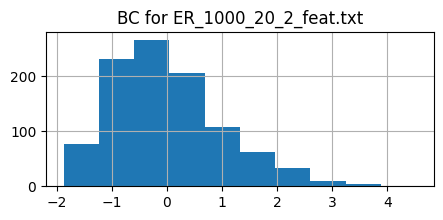

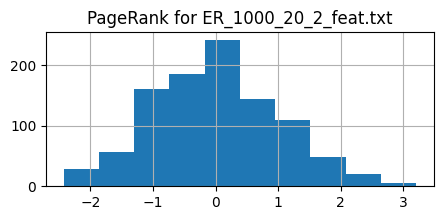

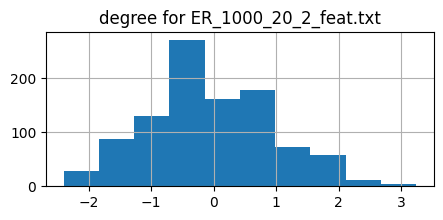

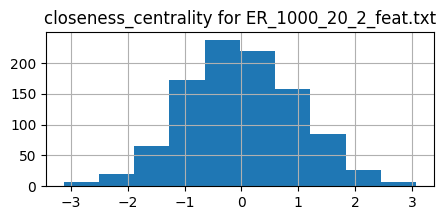

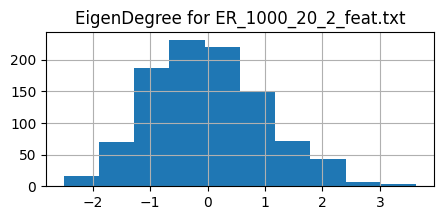

In [244]:
i = 10
PATH_TO_TRAIN = "./BRKGA/instances/Erdos/train/"
graphFeatures = [(PATH_TO_TRAIN+"feats/"+feat).replace(".txt", "")+"_feat.txt" for feat in os.listdir(PATH_TO_TRAIN+'txt')]

DataFeats = loadFeatures(graphFeatures[i], remove_degree = False)
for feat in DataFeats.columns:
    fig, ax = plt.subplots(figsize=(5,2)) 
    Standar(DataFeats[feat]).hist()
    name = graphFeatures[i].split("/")[-1]
    plt.title(f"{feat} for {name}")
    plt.show()

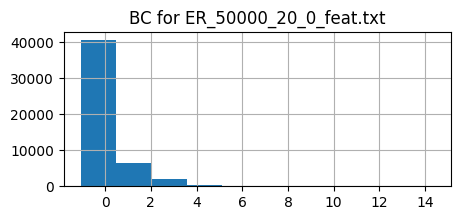

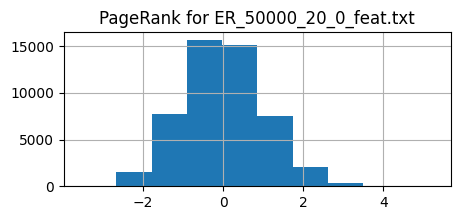

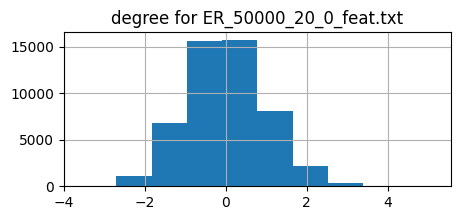

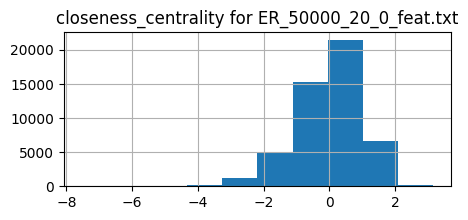

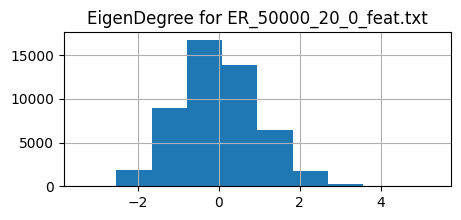

In [245]:
i = -1
PATH_TO_TRAIN = "./BRKGA/instances/Erdos/test/"
graphFeatures = [(PATH_TO_TRAIN+"feats/"+feat).replace(".txt", "")+"_feat.txt" for feat in os.listdir(PATH_TO_TRAIN+'txt')]

DataFeats = loadFeatures(graphFeatures[i], remove_degree = False)
for feat in DataFeats.columns:
    fig, ax = plt.subplots(figsize=(5,2)) 
    Standar(DataFeats[feat]).hist()
    name = graphFeatures[i].split("/")[-1]
    plt.title(f"{feat} for {name}")
    plt.show()

## Pruebas de entrenamiento

In [9]:
def getDimParams(model):
    # Returns the number of parameters needed
    sum_ = 0
    for name, param in model.named_parameters():
        m = 1
        #print(name, param.shape)
        #print(np.max(param.detach().numpy()), np.min(param.detach().numpy()))
        for n in param.shape:
            m*=n
        sum_ += m
    return sum_ 

def getStateDict(model, params):
    # reensamble the original state dict with new values
    sd = model.state_dict()
    sum_ = 0
    from_ = 0

    for name, param in model.named_parameters():
        m = 1
        for n in param.shape:
            m*=n
        #print(m)
        #print(vals[from_:from_+m].reshape(param.shape).shape)
        sd[name] = torch.tensor(params[from_:from_+m].reshape(param.shape))
        from_ += m
        #print(from_)
    return sd

def SimpleweightedCrossEntropy(y, p, w):
    return np.sum(y*(1-p)*w[0] + (1-y)*p*w[1]) / len(y)

def Func(X, MDH = False, alpha = 0.7):
    # Objective function
    
    if not MDH:
        sd = getStateDict(Models[i], X)
        Models[i].load_state_dict(sd)
    else:
        alpha = 1
        
    
    value = 0.0
    loss = 0.0
    
    for ig, data in enumerate(Graphs_Train):
        
        if MDH:
            y_pred = None
        else:
            data = data.to(device)
            y_pred = torch.exp(Models[i](data)).T[1]
        
        
        ts = len(FindMinimumTarget(graphs[ig], out = y_pred, threshold = 0.5)[0])
        
        val = ts / graphs[ig].number_of_nodes()
        
        value += val
        
        #"""
        if not MDH:
            zeros = np.zeros(data.num_nodes)
            zeros[torch.topk(y_pred, ts)[1]] = 1
            weigth_minoritaria = np.sum(zeros==0)/np.sum(zeros)
            loss += SimpleweightedCrossEntropy(zeros, y_pred.detach().numpy(), [weigth_minoritaria, 1])
        
        #"""
        
        
    
    value /= len(Graphs_Train) 
    loss /= len(Graphs_Train) 
    #return value
    
    return value * (alpha) + loss * (1 - alpha)

In [10]:
def getDataSet(file, file_graph, scale, remove_BC = False):
    
    G = loadGraph(file_graph)
    Features = []
    temp = []
    try:
        with open(file) as f:
            c = 0

            for line in f.readlines()[1:]:
                c+=1
                feats = np.array(line.split(","), dtype = float)
                temp.append(feats)
        temp = np.array(temp)
        if remove_BC:
            temp = np.delete(temp, 0, 1)
        Features.append(temp)
    except Exception as e:
        print(er)
        print(line)
        print(c)
        print(e)

    Graphs_Train = Convert2DataSet([G], [[]], feats = Features, scale = scale)

    return Graphs_Train

In [11]:
SCL = True
#PATH_TO_TRAIN = "./BRKGA/instances/scalefree/train/"
PATH_TO_TRAIN = "./BRKGA/instances/Erdos/train/"

PATH_SAVE_TRAINS = "Models/runs/scalefree/GA/"

SEED = 13

max_iterations = 1
pop_size = 2
elitratio = 0.1
threshold = 0.5

dt_string = datetime.now().strftime("%m-%d_%H-%M")

Instances = [graph for graph in os.listdir(PATH_TO_TRAIN + 'txt')]
Instances.sort()

graphs = []
for er in Instances:
    graph = igraph.Graph.Read_Edgelist(PATH_TO_TRAIN+"txt/"+er, directed = False)
    graphs.append(graph.to_networkx())    

OptInstances = [graph for graph in os.listdir(PATH_TO_TRAIN+'optimal')]
OptInstances.sort()
Solutions = []

for er in OptInstances:
    opt = []
    with open(PATH_TO_TRAIN+'optimal/'+er) as f:
        for line in f.readlines():
            opt.append(int(line.replace("\n", "")))
    Solutions.append(opt)   


print("\nCargando Features...\n")
graphFeatures = [feat for feat in os.listdir(PATH_TO_TRAIN+'feats')]
graphFeatures.sort()
Features = []
for er in graphFeatures:
    temp = []
    try:
        with open(PATH_TO_TRAIN+'feats/'+er) as f:
            c = 0

            for line in f.readlines()[1:]:
                c+=1
                feats = np.array(line.split(","), dtype = float)
                temp.append(feats)
        temp = np.array(temp)
        #temp = np.delete(temp, 2, 1)
        Features.append(temp)
    except Excepcion as e:
        print(er)
        print(line)
        print(c)
        print(e)
    
Graphs_Train = Convert2DataSet(graphs, Solutions, feats = Features, scale = SCL)

num_features = Graphs_Train[0].num_features
num_classes = Graphs_Train[0].num_classes


Cargando Features...



In [12]:
import torch.nn as nn
import torch_geometric.nn as geom_nn
import torch.nn.functional as F
import torch
from torch_geometric.nn import Linear

class GNN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes, name_layer = "SAGE"):
        super().__init__()
        self.name = name_layer
        layer = None
        hidden_feats = 32
        
        if name_layer == "SAGE":
            layer = geom_nn.SAGEConv
            
            self.conv1 = layer(num_node_features, num_classes)
            #self.conv3 = Linear(hidden_feats, num_classes)
            
        elif name_layer == "GAT":
            layer = geom_nn.GATConv
            
            self.conv1 = layer(num_node_features, num_classes)
            #self.conv3 = Linear(hidden_feats, num_classes)
            
        elif name_layer == "GCN":
            layer = geom_nn.GCNConv
            
            self.conv1 = layer(num_node_features, num_classes)
            #self.conv1 = layer(num_node_features, hidden_feats)
            #self.conv3 = Linear(hidden_feats, num_classes)
            
        elif name_layer == "GraphConv":
            layer = geom_nn.GraphConv
            
            self.conv1 = layer(num_node_features, num_classes)
            
        elif name_layer == "SGConv":
            layer = geom_nn.SGConv
            
            self.conv1 = layer(num_node_features, num_classes)
            #self.conv3 = Linear(hidden_feats, num_classes)
        
        
        else:
            print("Nanais")
    
        
        #self.conv2 = layer(hidden_feats, hidden_feats)
        #self.conv3 = Linear(hidden_feats, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        #x = self.conv2(x, edge_index)

        #return F.log_softmax(self.conv3(x), dim=1)
        #if self.name in ['GraphConv', 'GCN', 'SAGE']:
        return F.log_softmax(x, dim=1)
        #else:
        #    return F.log_softmax(self.conv3(x), dim=1)
        

In [13]:
seed = 13
device = 'cpu'
layers = ["GCN", "GAT","GraphConv", "SAGE", "SGConv"]

torch.manual_seed(seed)
Models = [GNN(num_features, num_classes, name_layer = layer_name) for 
         layer_name in layers]

In [ ]:
print(f"\nMDH value: {Func(_, MDH = True)}\n")

i = 4

varbound = np.array([[-10,10]] * getDimParams(Models[i]) )

algorithm_param = {'max_num_iteration' : 15,\
                   'population_size' : 10,\
                   'mutation_probability' : 0.4,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type' : 'uniform',\
                   'max_iteration_without_improv' : 100//2}

GA_model = ga(function = Func,\
            dimension = getDimParams(Models[i]),\
            variable_type = 'real',\
            variable_boundaries = varbound,\
            algorithm_parameters = algorithm_param,
            function_timeout = 1_000,
            convergence_curve = True)

GA_model.run()

sd = getStateDict(Models[i], GA_model.best_variable)
Models[i].load_state_dict(sd)
# 0.1983

## Probando con los modelos entrenados

In [39]:
seed = 13
device = 'cpu'
layers = ["GCN", "GAT","GraphConv", "SAGE", "SGConv"]

torch.manual_seed(seed)
Models = [GNN(5, num_classes, name_layer = layer_name) for 
         layer_name in layers]

In [40]:
# SAGE
vecs = ["GCN_iter_100.txt", "GAT_iter_100.txt", "GraphConv_iter_16.txt", 
        "SAGE_iter_100.txt", "SGConv_iter_39.txt" ]
#for i in range(len(layers)):
for i in range(3,4):
    print(layers[i])
    ps = "./Models/runs/Erdos/Pruebas_GA/Allfeatures/" + vecs[i]

    params = []
    with open(ps) as f:
        for line in f.readlines():
            params.append(float(line.replace("\n","")))
    params = np.array(params) 

    sd = getStateDict(Models[i], params)
    Models[i].load_state_dict(sd)

SAGE


ValueError: cannot reshape array of size 6 into shape (2,5)

In [34]:
#Models[i].load_state_dict(torch.load("./Models/runs/scalefree/Pruebas_GA/Allfeatures/SAGE_seed_13_thr_5_date_01-14_09-58.pt"))

In [35]:
Models[i].state_dict()

OrderedDict([('conv1.lin_l.weight',
              tensor([[ 1.2175,  7.9277,  7.1555,  3.0757],
                      [-8.4498,  2.0648,  7.8017, -8.9748]])),
             ('conv1.lin_l.bias', tensor([-2.9656, -6.6939])),
             ('conv1.lin_r.weight',
              tensor([[-6.3158, -3.6189, -1.7861,  1.5570],
                      [ 8.5988,  9.5464, -2.4602,  5.9350]]))])

In [38]:
"GAT"[:4]

'GAT'

In [36]:
torch.save(Models[i].state_dict(), f = f"./Models/runs/Erdos/Pruebas_GA/Allfeatures/SAGE100_seed_13_thr_5_date_01-16_15-32.pt")

In [324]:
dd = igraph.Graph().Read_Edgelist(file_graph_short).to_networkx()
Features = []
temp = []
try:
    with open(file_short) as f:
        c = 0

        for line in f.readlines()[1:]:
            c+=1
            feats = np.array(line.split(","), dtype = float)
            temp.append(feats)
    temp = np.array(temp)
    
    Features.append(temp)
except Exception as e:
    print(er)
    print(line)
    print(c)
    print(e)

x_p = Convert2DataSet([dd], [[]], feats = Features, scale = True)
torch.exp(Models[i](x_p[0]))

tensor([[1.1799e-02, 9.8820e-01],
        [4.8888e-03, 9.9511e-01],
        [1.7897e-02, 9.8210e-01],
        ...,
        [8.8733e-01, 1.1267e-01],
        [9.9955e-01, 4.5231e-04],
        [9.6518e-01, 3.4815e-02]], grad_fn=<ExpBackward0>)

In [325]:
x_p[0]

Data(edge_index=[2, 819090], num_nodes=50515, x=[50515, 5], y=[50515], num_classes=2)

In [328]:
dc = igraph.Graph.Read_Edgelist(file_graph_short, directed = True).to_networkx()
x_p = Convert2DataSet([dc], [[]], feats = Features, scale = True)
#FindMinimumTarget(dc, torch.tensor(torch.exp(Models[i](x_p[0])).detach().numpy().T[1]))
kk = torch.exp(Models[i](x_p[0]))
dc = igraph.Graph.Read_Edgelist(file_graph_short, directed = False).to_networkx()
#_, ts = FindMinimumTarget(dc, torch.tensor(kk.detach().numpy().T[1]))
ts

2024

In [329]:
x_p[0]

Data(edge_index=[2, 1638180], num_nodes=50515, x=[50515, 5], y=[50515], num_classes=2)

In [322]:
dc = igraph.Graph.Read_Edgelist(file_graph_short, directed = False).to_networkx()
x_p = Convert2DataSet([dc], [[]], feats = Features, scale = True)
_, ts = FindMinimumTarget(dc, torch.tensor(torch.exp(Models[i](x_p[0])).detach().numpy().T[1]))
ts

2024

In [267]:
x_p = Convert2DataSet([dd], [[]], feats = None, scale = True)
Models[i](x_p[0])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2888x1 and 5x2)

In [269]:
x_p = Convert2DataSet([G_short], [[]], feats = None, scale = True)[0]
Models[i](x_p[0]);

KeyError: 0

In [ ]:
getDataSet(file_short, file_graph_short, scale = SCL, remove_BC=False)[0]

In [270]:
getDataSet??

In [248]:
loadGraph??

In [333]:
#Trials = ["gemsec_facebook_artist", "graph_karate", "socfb-Mich67", "graph_ncstrlwg2", "graph_CA-HepPh", "graph_CA-AstroPh", 
#              "musae_git", "graph_CA-CondMat", "graph_Email-Enron", "gemsec_facebook_artist", "deezer_HR"]

Trials = [k.replace(".txt","") for k in os.listdir("./BRKGA/instances/socialnetworks/txt/") if ".txt" in k]
Trials.sort(reverse=True)

Res = {t:{trial:{} for trial in Trials} for t in layers}
i = 3
print(f"\n---------{layers[i]}---------\n")


for trial in Trials:
    print(f"\nSig: {trial} \n")
    file_short = f"./BRKGA/instances/socialnetworks/feats/{trial}_feat.txt"
    file_graph_short = f"./BRKGA/instances/socialnetworks/txt/{trial}.txt"

    DS_short = getDataSet(file_short, file_graph_short, scale = SCL, remove_BC=True)[0]

    G_short = loadGraph(file_graph_short)

    y_pred = torch.exp(Models[i](DS_short)).T[1]
    
    save("./Models/probabilidades/scalefree_socialnetworks/Pruebas_GA/SinBC/",trial+".txt","SAGE",y_pred)



---------SAGE---------


Sig: socfb-nips-ego 


Sig: socfb-Mich67 


Sig: socfb-Brandeis99 


Sig: soc-gplus 


Sig: musae_git 


Sig: loc-gowalla_edges 


Sig: graph_ncstrlwg2 


Sig: graph_karate 


Sig: graph_jazz 


Sig: graph_football 


Sig: graph_dolphins 


Sig: graph_actors_dat 


Sig: graph_Email-Enron 


Sig: graph_CA-HepTh 


Sig: graph_CA-HepPh 


Sig: graph_CA-GrQc 


Sig: graph_CA-CondMat 


Sig: graph_CA-AstroPh 


Sig: gemsec_facebook_artist 


Sig: ego-facebook 


Sig: deezer_HR 


Sig: com-dblp.ungraph 


Sig: Amazon0601 


Sig: Amazon0505 


Sig: Amazon0312 


Sig: Amazon0302 



In [334]:
Trials = [k.replace(".txt", "") for k in os.listdir("./BRKGA/instances/Erdos/test/txt/")]
Trials.sort(reverse=True)

Res = {t:{trial:{} for trial in Trials} for t in layers}
i = 3
print(f"\n---------{layers[i]}---------\n")


for trial in Trials:
    print(f"\nSig: {trial} \n")
    file_short = f"./BRKGA/instances/Erdos/test/feats/{trial}_feat.txt"
    file_graph_short = f"./BRKGA/instances/Erdos/test/txt/{trial}.txt"

    DS_short = getDataSet(file_short, file_graph_short, scale = SCL, remove_BC=True)[0]

    G_short = loadGraph(file_graph_short)

    y_pred = torch.exp(Models[i](DS_short)).T[1]
    save("./Models/probabilidades/scalefree_Erdos/Pruebas_GA/SinBC/",trial+".txt","SAGE",y_pred)



---------SAGE---------


Sig: ER_50000_20_0 


Sig: ER_50000_15_0 


Sig: ER_50000_10_0 


Sig: ER_30000_20_0 


Sig: ER_30000_15_0 


Sig: ER_30000_10_0 


Sig: ER_20000_20_1 


Sig: ER_20000_20_0 


Sig: ER_20000_15_1 


Sig: ER_20000_15_0 


Sig: ER_20000_10_1 


Sig: ER_20000_10_0 


Sig: ER_10000_20_1 


Sig: ER_10000_20_0 


Sig: ER_10000_15_1 


Sig: ER_10000_15_0 


Sig: ER_10000_10_1 


Sig: ER_10000_10_0 



In [224]:
Models[i]

GNN(
  (conv1): SAGEConv(5, 2, aggr=mean)
)

In [214]:
# Guardando las probs para hacer pruebas
def save(PATH_SAVE_RESULTS, name, model, out):
    with open(f'{PATH_SAVE_RESULTS}{model}_{name}', 'w') as f:
        out = out.detach().numpy()
        e = 0.0001
        for o in out:
            f.write(str(np.round(o + e, 6)))
            f.write("\n")

            


In [201]:
Trials = [k.replace(".txt", "") for k in os.listdir("./BRKGA/instances/Erdos/test/txt/")]

Res_er = {t:{trial:{} for trial in Trials} for t in layers}

print(f"\n---------{layers[i]}---------\n")


for trial in Trials:
    print(f"\nSig: {trial} \n")
    file_short = f"./BRKGA/instances/Erdos/test/feats/{trial}_feat.txt"
    file_graph_short = f"./BRKGA/instances/Erdos/test/txt/{trial}.txt"

    DS_short = getDataSet(file_short, file_graph_short, scale = SCL, remove_BC=True)[0]

    G_short = loadGraph(file_graph_short)

    y_pred = torch.exp(Models[i](DS_short)).T[1]
    #plt.hist(y_pred.detach().numpy())

    _, ts = FindMinimumTarget(G_short, out = y_pred, threshold = 0.5, print_= False)
    Res_er[layers[i]][trial]["H"] = ts
    print(ts)

    y_deg = y_pred.detach().numpy() * np.array(list(nx.degree(G_short))).T[1]
    _, ts = FindMinimumTarget(G_short, out = torch.tensor(y_deg) , threshold = 0.5, print_= False)
    Res_er[layers[i]][trial]["HM"] = ts
Res_er


---------SGConv---------


Sig: ER_20000_10_0 

3354

Sig: ER_20000_20_1 

4788

Sig: ER_30000_15_0 

6235

Sig: ER_20000_10_1 

3305

Sig: ER_20000_15_1 

4064

Sig: ER_50000_10_0 

8347

Sig: ER_20000_20_0 

4732

Sig: ER_10000_10_0 

1689

Sig: ER_10000_15_0 

2065

Sig: ER_10000_20_1 

2471

Sig: ER_20000_15_0 

4146

Sig: ER_30000_10_0 

4957

Sig: ER_50000_15_0 

10505

Sig: ER_10000_10_1 

1723

Sig: ER_10000_15_1 

2075

Sig: ER_10000_20_0 

2412

Sig: ER_30000_20_0 

6957

Sig: ER_50000_20_0 

11543


{'GCN': {'ER_20000_10_0': {},
  'ER_20000_20_1': {},
  'ER_30000_15_0': {},
  'ER_20000_10_1': {},
  'ER_20000_15_1': {},
  'ER_50000_10_0': {},
  'ER_20000_20_0': {},
  'ER_10000_10_0': {},
  'ER_10000_15_0': {},
  'ER_10000_20_1': {},
  'ER_20000_15_0': {},
  'ER_30000_10_0': {},
  'ER_50000_15_0': {},
  'ER_10000_10_1': {},
  'ER_10000_15_1': {},
  'ER_10000_20_0': {},
  'ER_30000_20_0': {},
  'ER_50000_20_0': {}},
 'GAT': {'ER_20000_10_0': {},
  'ER_20000_20_1': {},
  'ER_30000_15_0': {},
  'ER_20000_10_1': {},
  'ER_20000_15_1': {},
  'ER_50000_10_0': {},
  'ER_20000_20_0': {},
  'ER_10000_10_0': {},
  'ER_10000_15_0': {},
  'ER_10000_20_1': {},
  'ER_20000_15_0': {},
  'ER_30000_10_0': {},
  'ER_50000_15_0': {},
  'ER_10000_10_1': {},
  'ER_10000_15_1': {},
  'ER_10000_20_0': {},
  'ER_30000_20_0': {},
  'ER_50000_20_0': {}},
 'GraphConv': {'ER_20000_10_0': {},
  'ER_20000_20_1': {},
  'ER_30000_15_0': {},
  'ER_20000_10_1': {},
  'ER_20000_15_1': {},
  'ER_50000_10_0': {},
  'ER

In [149]:
# Evaluando sobre varios grafos
Trials = ["graph_karate", "socfb-Mich67", "graph_ncstrlwg2", "graph_CA-HepPh", "graph_CA-AstroPh", 
              "musae_git", "graph_CA-CondMat", "graph_Email-Enron", "gemsec_facebook_artist", "deezer_HR"]

Res = {t:{trial:{} for trial in Trials} for t in layers}

for i in (range(len(layers))):
    print(f"\n---------{layers[i]}---------\n")
    

    for trial in Trials:
        #print(f"\nSig: {trial} \n")
        file_short = f"./BRKGA/instances/socialnetworks/feats/{trial}_feat.txt"
        file_graph_short = f"./BRKGA/instances/socialnetworks/txt/{trial}.txt"

        DS_short = getDataSet(file_short, file_graph_short, scale = SCL)[0]

        G_short = loadGraph(file_graph_short)

        y_pred = torch.exp(Models[i](DS_short)).T[1]
        #plt.hist(y_pred.detach().numpy())

        _, ts = FindMinimumTarget(G_short, out = y_pred, threshold = 0.5, print_= False)
        Res[layers[i]][trial]["H"] = ts

        y_deg = y_pred.detach().numpy() * np.array(list(nx.degree(G_short))).T[1]
        _, ts = FindMinimumTarget(G_short, out = torch.tensor(y_deg) , threshold = 0.5, print_= False)
        Res[layers[i]][trial]["HM"] = ts
Res


---------GCN---------



/home/iiia/iiia/GNN-BRKGA/FastCover/utils.py:111: RuntimeWarning: invalid value encountered in true_divide
  Infected += (Num_Neighs_Infected/Num_Neighs >= threshold)



---------GAT---------


---------GraphConv---------


---------SAGE---------


---------SGConv---------



{'GCN': {'graph_karate': {'H': 10, 'HM': 8},
  'socfb-Mich67': {'H': 211, 'HM': 203},
  'graph_ncstrlwg2': {'H': 1131, 'HM': 1120},
  'graph_CA-HepPh': {'H': 1555, 'HM': 1535},
  'graph_CA-AstroPh': {'H': 1724, 'HM': 1637},
  'musae_git': {'H': 235, 'HM': 198},
  'graph_CA-CondMat': {'H': 2944, 'HM': 2927},
  'graph_Email-Enron': {'H': 2847, 'HM': 2848},
  'gemsec_facebook_artist': {'H': 772, 'HM': 802},
  'deezer_HR': {'H': 2502, 'HM': 2447}},
 'GAT': {'graph_karate': {'H': 20, 'HM': 13},
  'socfb-Mich67': {'H': 1337, 'HM': 220},
  'graph_ncstrlwg2': {'H': 1713, 'HM': 1113},
  'graph_CA-HepPh': {'H': 4337, 'HM': 1619},
  'graph_CA-AstroPh': {'H': 7464, 'HM': 1869},
  'musae_git': {'H': 9733, 'HM': 479},
  'graph_CA-CondMat': {'H': 6606, 'HM': 2921},
  'graph_Email-Enron': {'H': 9580, 'HM': 2933},
  'gemsec_facebook_artist': {'H': 19886, 'HM': 1087},
  'deezer_HR': {'H': 15446, 'HM': 2647}},
 'GraphConv': {'graph_karate': {'H': 15, 'HM': 14},
  'socfb-Mich67': {'H': 988, 'HM': 206},
  

In [151]:
Trials = ["graph_karate", "socfb-Mich67", "graph_ncstrlwg2", "graph_CA-HepPh", "graph_CA-AstroPh", 
              "musae_git", "graph_CA-CondMat", "graph_Email-Enron", "gemsec_facebook_artist", "deezer_HR"]

Res_MDH = {t:{trial:{} for trial in Trials} for t in ["MDH"]}
for trial in Trials:
        #print(f"\nSig: {trial} \n")
        file_short = f"./BRKGA/instances/socialnetworks/feats/{trial}_feat.txt"
        file_graph_short = f"./BRKGA/instances/socialnetworks/txt/{trial}.txt"

        #DS_short = getDataSet(file_short, file_graph_short, scale = SCL)[0]

        G_short = loadGraph(file_graph_short)

        _, ts = FindMinimumTarget(G_short, out = None, threshold = 0.5, print_= False)
        
        Res_MDH["MDH"][trial]["H"] = ts
Res_MDH

{'MDH': {'graph_karate': {'H': 8},
  'socfb-Mich67': {'H': 206},
  'graph_ncstrlwg2': {'H': 1108},
  'graph_CA-HepPh': {'H': 1525},
  'graph_CA-AstroPh': {'H': 1637},
  'musae_git': {'H': 196},
  'graph_CA-CondMat': {'H': 2936},
  'graph_Email-Enron': {'H': 2880},
  'gemsec_facebook_artist': {'H': 789},
  'deezer_HR': {'H': 2377}}}

In [150]:
Trials = [k.replace(".txt", "") for k in os.listdir("./BRKGA/instances/Erdos/test/txt/")]

Res_er = {t:{trial:{} for trial in Trials} for t in layers}

for i in (range(len(layers))):
    print(f"\n---------{layers[i]}---------\n")
    

    for trial in Trials:
        #print(f"\nSig: {trial} \n")
        file_short = f"./BRKGA/instances/Erdos/test/feats/{trial}_feat.txt"
        file_graph_short = f"./BRKGA/instances/Erdos/test/txt/{trial}.txt"

        DS_short = getDataSet(file_short, file_graph_short, scale = SCL)[0]

        G_short = loadGraph(file_graph_short)

        y_pred = torch.exp(Models[i](DS_short)).T[1]
        #plt.hist(y_pred.detach().numpy())

        _, ts = FindMinimumTarget(G_short, out = y_pred, threshold = 0.5, print_= False)
        Res_er[layers[i]][trial]["H"] = ts

        y_deg = y_pred.detach().numpy() * np.array(list(nx.degree(G_short))).T[1]
        _, ts = FindMinimumTarget(G_short, out = torch.tensor(y_deg) , threshold = 0.5, print_= False)
        Res_er[layers[i]][trial]["HM"] = ts
Res_er


---------GCN---------


---------GAT---------


---------GraphConv---------


---------SAGE---------


---------SGConv---------



{'GCN': {'ER_20000_10_0': {'H': 3368, 'HM': 3317},
  'ER_20000_20_1': {'H': 4817, 'HM': 4615},
  'ER_30000_15_0': {'H': 6274, 'HM': 6047},
  'ER_20000_10_1': {'H': 3323, 'HM': 3239},
  'ER_20000_15_1': {'H': 4119, 'HM': 4020},
  'ER_50000_10_0': {'H': 8416, 'HM': 8207},
  'ER_20000_20_0': {'H': 4764, 'HM': 4621},
  'ER_10000_10_0': {'H': 1675, 'HM': 1637},
  'ER_10000_15_0': {'H': 2076, 'HM': 2005},
  'ER_10000_20_1': {'H': 2474, 'HM': 2296},
  'ER_20000_15_0': {'H': 4187, 'HM': 3996},
  'ER_30000_10_0': {'H': 5020, 'HM': 4930},
  'ER_50000_15_0': {'H': 10555, 'HM': 10106},
  'ER_10000_10_1': {'H': 1704, 'HM': 1640},
  'ER_10000_15_1': {'H': 2088, 'HM': 2024},
  'ER_10000_20_0': {'H': 2426, 'HM': 2298},
  'ER_30000_20_0': {'H': 7018, 'HM': 6812},
  'ER_50000_20_0': {'H': 11657, 'HM': 11328}},
 'GAT': {'ER_20000_10_0': {'H': 5932, 'HM': 3101},
  'ER_20000_20_1': {'H': 6453, 'HM': 4569},
  'ER_30000_15_0': {'H': 9385, 'HM': 5711},
  'ER_20000_10_1': {'H': 5920, 'HM': 3129},
  'ER_20000_1

In [152]:
Trials = [k.replace(".txt", "") for k in os.listdir("./BRKGA/instances/Erdos/test/txt/")]
Res_MDH_er = {t:{trial:{} for trial in Trials} for t in ["MDH"]}

for trial in Trials:
        #print(f"\nSig: {trial} \n")
        file_short = f"./BRKGA/instances/Erdos/test/feats/{trial}_feat.txt"
        file_graph_short = f"./BRKGA/instances/Erdos/test/txt/{trial}.txt"

        #DS_short = getDataSet(file_short, file_graph_short, scale = SCL)[0]

        G_short = loadGraph(file_graph_short)

        _, ts = FindMinimumTarget(G_short, out = None, threshold = 0.5, print_= False)
        
        Res_MDH_er["MDH"][trial]["H"] = ts
Res_MDH_er

{'MDH': {'ER_20000_10_0': {'H': 3228},
  'ER_20000_20_1': {'H': 4512},
  'ER_30000_15_0': {'H': 5923},
  'ER_20000_10_1': {'H': 3187},
  'ER_20000_15_1': {'H': 3964},
  'ER_50000_10_0': {'H': 8055},
  'ER_20000_20_0': {'H': 4529},
  'ER_10000_10_0': {'H': 1625},
  'ER_10000_15_0': {'H': 1966},
  'ER_10000_20_1': {'H': 2255},
  'ER_20000_15_0': {'H': 3942},
  'ER_30000_10_0': {'H': 4852},
  'ER_50000_15_0': {'H': 9898},
  'ER_10000_10_1': {'H': 1624},
  'ER_10000_15_1': {'H': 1974},
  'ER_10000_20_0': {'H': 2249},
  'ER_30000_20_0': {'H': 6746},
  'ER_50000_20_0': {'H': 11188}}}

In [177]:
Data = pd.DataFrame()
for l in layers:
    d = pd.DataFrame(Res[l]).T
    d.columns = [l+"H", l+"HM"]
    Data = pd.concat([Data, d], axis = 1)

d = pd.DataFrame(Res_MDH["MDH"]).T
d.columns = ["MDH"]
Data = pd.concat([Data, d], axis = 1)
Data.to_csv("ComparacionRapida_sf.csv")

In [176]:
Data = pd.DataFrame()
for l in layers:
    d = pd.DataFrame(Res_er[l]).T
    d.columns = [l+"H", l+"HM"]
    Data = pd.concat([Data, d], axis = 1)

d = pd.DataFrame(Res_MDH_er["MDH"]).T
d.columns = ["MDH"]
Data = pd.concat([Data, d], axis = 1)
Data.to_csv("ComparacionRapida.csv")

In [106]:
for ig, data in enumerate(Graphs_Train):
    
        data = data.to(device)
        y_pred = torch.exp(Models[i](data)).T[1]
        ts = len(FindMinimumTarget(graphs[ig], out = y_pred, threshold = 0.5)[0])
        break



In [107]:
ts

171

In [108]:
len(Solutions[0])

141

In [109]:
zeros = np.zeros(data.num_nodes)
zeros[torch.topk(y_pred, ts)[1]] = 1
SimpleweightedCrossEntropy(zeros, y_pred.detach().numpy(), [9.2, 1]) 

0.35522462109476327

In [110]:
np.sum(zeros==0)/np.sum(zeros)

4.847953216374269

(array([276., 110.,  69.,  64.,  63.,  46.,  77.,  60.,  96., 139.]),
 array([0.00273462, 0.10244006, 0.2021455 , 0.30185094, 0.4015564 ,
        0.50126183, 0.6009673 , 0.70067275, 0.80037814, 0.9000836 ,
        0.99978906], dtype=float32),
 <BarContainer object of 10 artists>)

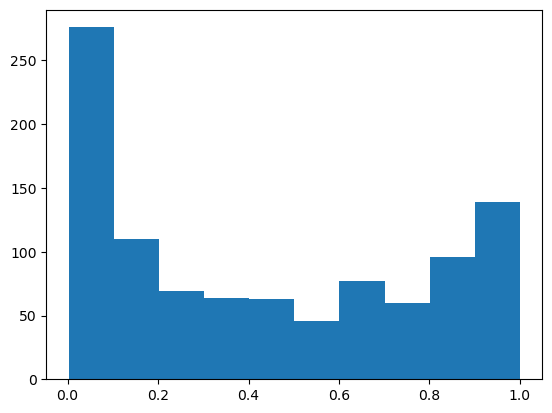

In [111]:
plt.hist(y_pred.detach().numpy())

In [112]:
print("Short")
file_short = "./BRKGA/instances/socialnetworks/feats/graph_CA-AstroPh_feat.txt"
file_graph_short = "./BRKGA/instances/socialnetworks/txt/graph_CA-AstroPh.txt"

DS_short = getDataSet(file_short, file_graph_short, scale = SCL)[0]

G_short = loadGraph(file_graph_short)

Short


(array([15500.,   585.,   298.,   249.,   207.,   183.,   178.,   216.,
          238.,  1118.]),
 array([5.7953154e-04, 1.0052158e-01, 2.0046362e-01, 3.0040568e-01,
        4.0034771e-01, 5.0028974e-01, 6.0023183e-01, 7.0017385e-01,
        8.0011588e-01, 9.0005797e-01, 1.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

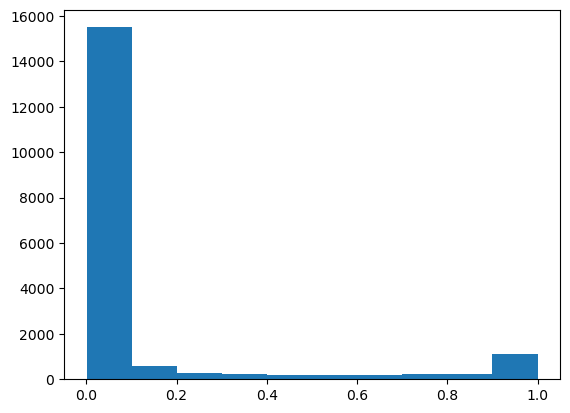

In [113]:
y_pred = torch.exp(Models[i](DS_short)).T[1]
plt.hist(y_pred.detach().numpy())

In [238]:
_, ts = FindMinimumTarget(G_short, out = None, threshold = 0.5, print_= True,)
ts

FastCover\utils.py:111: RuntimeWarning: invalid value encountered in true_divide
  Infected += (Num_Neighs_Infected/Num_Neighs >= threshold)


0.00 Infected
1.00 Infected



1637

In [114]:
_, ts = FindMinimumTarget(G_short, out = y_pred, threshold = 0.5, print_= True,)
ts

/home/iiia/iiia/GNN-BRKGA/FastCover/utils.py:111: RuntimeWarning: invalid value encountered in true_divide
  Infected += (Num_Neighs_Infected/Num_Neighs >= threshold)


0.00 Infected
1.00 Infected



1705

In [115]:
y_deg = y_pred.detach().numpy() * np.array(list(nx.degree(G_short))).T[1]
_, ts = FindMinimumTarget(G_short, out = torch.tensor(y_deg) , threshold = 0.5, print_= True,)
ts

0.00 Infected
0.82 Infected
0.89 Infected
1.00 Infected



1635

In [74]:
print("Large")
file_large = "./BRKGA/instances/socialnetworks/feats/graph_Email-Enron_feat.txt"
file_graph_large = "./BRKGA/instances/socialnetworks/txt/graph_Email-Enron.txt"
DS_large = getDataSet(file_large, file_graph_large, scale=SCL)[0]
G_large = loadGraph(file_graph_large)

Large


(array([34995.,   253.,   127.,   114.,    75.,    70.,    69.,    73.,
          100.,   816.]),
 array([5.7940639e-04, 1.0052147e-01, 2.0046352e-01, 3.0040559e-01,
        4.0034765e-01, 5.0028968e-01, 6.0023177e-01, 7.0017380e-01,
        8.0011588e-01, 9.0005791e-01, 1.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

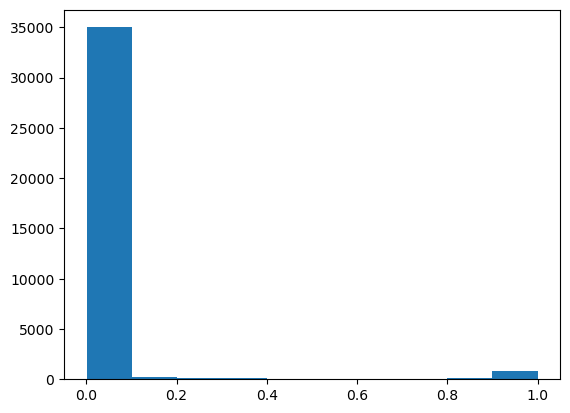

In [116]:
y_pred = torch.exp(Models[i](DS_large)).T[1]
plt.hist(y_pred.detach().numpy())

In [117]:
#_, ts = FindMinimumTarget(G_large, out = None, threshold = 0.5, print_= True)
ts

0.03 Infected
1.00 Infected



2880

In [118]:
_, ts = FindMinimumTarget(G_large, out = y_pred, threshold = 0.5, print_= True)
ts

0.00 Infected
0.96 Infected
1.00 Infected



2851

In [119]:
y_deg = y_pred.detach().numpy() * np.array(list(nx.degree(G_large))).T[1]
_, ts = FindMinimumTarget(G_large, out = torch.tensor(y_deg) , threshold = 0.5, print_= True,)
ts
#2824

0.03 Infected
1.00 Infected



2876

In [98]:
print("Erdos")
file_erdos = "./BRKGA/instances/Erdos/test/feats/ER_30000_15_0_feat.txt"
file_graph_erdos = "./BRKGA/instances/Erdos/test/txt/ER_30000_15_0.txt"
DS_Erdos = getDataSet(file_erdos, file_graph_erdos, scale=SCL)[0]
G_Erdos = loadGraph(file_graph_erdos)

Erdos


(array([  729.,   632.,   659.,   687.,   860.,   981.,  1291.,  1889.,
         3364., 18908.]),
 array([0.00300855, 0.10270652, 0.20240448, 0.30210245, 0.40180042,
        0.5014984 , 0.60119635, 0.7008943 , 0.80059224, 0.90029025,
        0.9999882 ], dtype=float32),
 <BarContainer object of 10 artists>)

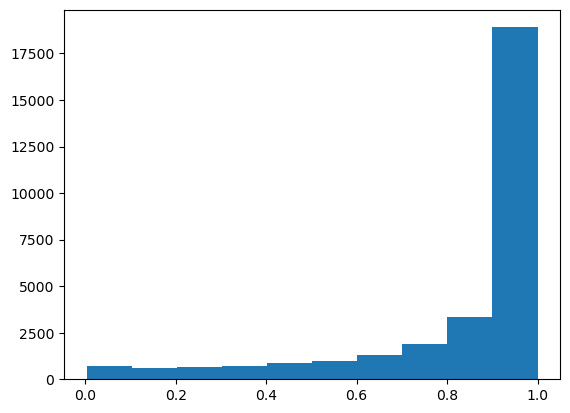

In [120]:
y_pred = torch.exp(Models[i](DS_Erdos)).T[1]
plt.hist(y_pred.detach().numpy())

In [100]:
_, ts = FindMinimumTarget(G_Erdos, out = None, threshold = 0.5, print_= True)
ts

0.00 Infected
0.05 Infected
0.10 Infected
0.17 Infected
1.00 Infected



5923

In [121]:
_, ts = FindMinimumTarget(G_Erdos, out = y_pred, threshold = 0.5, print_= True)
ts

0.00 Infected
0.05 Infected
0.10 Infected
0.16 Infected
0.26 Infected
1.00 Infected



6286

In [122]:
y_deg = y_pred.detach().numpy() * np.array(list(nx.degree(G_Erdos))).T[1]
_, ts = FindMinimumTarget(G_Erdos, out = torch.tensor(y_deg) , threshold = 0.5, print_= True,)
ts
#6726

0.00 Infected
0.05 Infected
0.10 Infected
0.17 Infected
0.29 Infected
1.00 Infected



6031